In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


In [14]:
# Import the data 
ltc_com = pd.read_csv('../data/BC/bc_ltc_complete_sep18.csv')
ltc_com.info()
# ltc_com.columns.values
# for each in ltc.columns.values:
#     print(each)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 48 columns):
FACILITY_NAME               294 non-null object
HCC_CODE                    294 non-null object
HLTH_AUTH                   294 non-null object
OWNERSHIP                   294 non-null object
STREET_ADDRESS              294 non-null object
CITY                        294 non-null object
POSTAL                      294 non-null object
REGULATION                  294 non-null object
ACCRED_STATUS               294 non-null object
BEDS_TOTAL                  294 non-null int64
INCIDENT_OUTBREAK_100       268 non-null float64
AGE                         287 non-null float64
FEMALE                      287 non-null float64
AGE_85_PLUS                 287 non-null float64
AGE_UNDER_65                287 non-null float64
STAY_LENGTH                 193 non-null float64
DEPRESSION                  287 non-null float64
ADL_DEPENDENT               287 non-null float64
CPS_SEVERE              

In [15]:
ltc_com[ltc_com['FACILITY_NAME'].str.contains('Special Unit', regex=False, na=False)]
# ltc_fil['REGULATION'].value_counts()

,FACILITY_NAME,HCC_CODE,HLTH_AUTH,OWNERSHIP,STREET_ADDRESS,CITY,POSTAL,REGULATION,ACCRED_STATUS,BEDS_TOTAL,INCIDENT_OUTBREAK_100,AGE,FEMALE,AGE_85_PLUS,AGE_UNDER_65,STAY_LENGTH,DEPRESSION,ADL_DEPENDENT,CPS_SEVERE,DEMENTIA,ABS_PHYS_ABUSIVE,ISE,ISE_LOW,CMI,THERAPY_PT,THERAPY_RT,THERAPY_OT,MEDS_DEPRESSION,MEDS_ANTIPSYCHOTICS,RESTRAINTS,INSPECTIONS,latitude,longitude,Total Confirmed Cases,Total Deaths,outbreak,rooms_semi_binary,rooms_multi_binary,rooms_shared,resident_council,family_council,res_fam_council,beds_privatebinary,complaints_100,sub_complaints_100,incident_100sumXoutbreak,infractions_100,infractions_100Xdisease


In [16]:
ltc_fil = ltc_com
# Review NH facilities under the hospital act
len(ltc_fil.loc[(ltc_fil['HLTH_AUTH'] == 'Northern Health')])
# len(ltc_fil.loc[(ltc_fil['HLTH_AUTH'] == 'Northern Health') & (ltc_fil['REGULATION'].str.contains('Hospital'))]) 

24

In [17]:
# Review VIHA homes under the hospital act
len(ltc_fil.loc[(ltc_fil['HLTH_AUTH'] == 'Vancouver Island Health')])
# len(ltc_fil.loc[(ltc_fil['HLTH_AUTH'] == 'Vancouver Island Health') & (ltc_fil['REGULATION'].str.contains('Hospital'))])

59

In [18]:
# Remove facilities in Northern Health
# All homes in NH are operated by the HA except for 2
ltc_xNH = ltc_fil[~ltc_fil.HLTH_AUTH.str.contains("Northern", na=False)]
# ltc_noNH.info()

# Remove facilities in Island Health
ltc_xVIHA = ltc_fil[~ltc_fil.HLTH_AUTH.str.contains("Island", na=False)]
# ltc_noVIHA.info()

ltc_xNHorVIHA = ltc_xNH[~ltc_xNH.HLTH_AUTH.str.contains("Island", na=False)]

## Filter for homes in the Lower Mainland

1. An argument can be made that homes in IH, VIHA and NH are geographically distinct from those in Fraser and VCH (lower mainland)

2. Homes regulated under the Hospital Act in NH and VIHA are missing data
    - Complaints data for Hospital Act facilities in Northern Health are not available 
        - 12/24 homes in NH
        - If we want to include complaints, we will have to remove homes in NH
    - Incident data for Hospital Act facilities in Vancouver Island Health are not available 
        - 22/59 homes in VIHA
        - If we want to include incident data, we will have to remove homes in VIHA


In [19]:
# Dataset with NH, VIHA and IH homes removed
ltc_mainland = ltc_xNHorVIHA[~ltc_xNHorVIHA.HLTH_AUTH.str.contains("Interior", na=False)]
ltc_mainland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 3 to 293
Data columns (total 48 columns):
FACILITY_NAME               134 non-null object
HCC_CODE                    134 non-null object
HLTH_AUTH                   134 non-null object
OWNERSHIP                   134 non-null object
STREET_ADDRESS              134 non-null object
CITY                        134 non-null object
POSTAL                      134 non-null object
REGULATION                  134 non-null object
ACCRED_STATUS               134 non-null object
BEDS_TOTAL                  134 non-null int64
INCIDENT_OUTBREAK_100       132 non-null float64
AGE                         132 non-null float64
FEMALE                      132 non-null float64
AGE_85_PLUS                 132 non-null float64
AGE_UNDER_65                132 non-null float64
STAY_LENGTH                 78 non-null float64
DEPRESSION                  132 non-null float64
ADL_DEPENDENT               132 non-null float64
CPS_SEVERE               

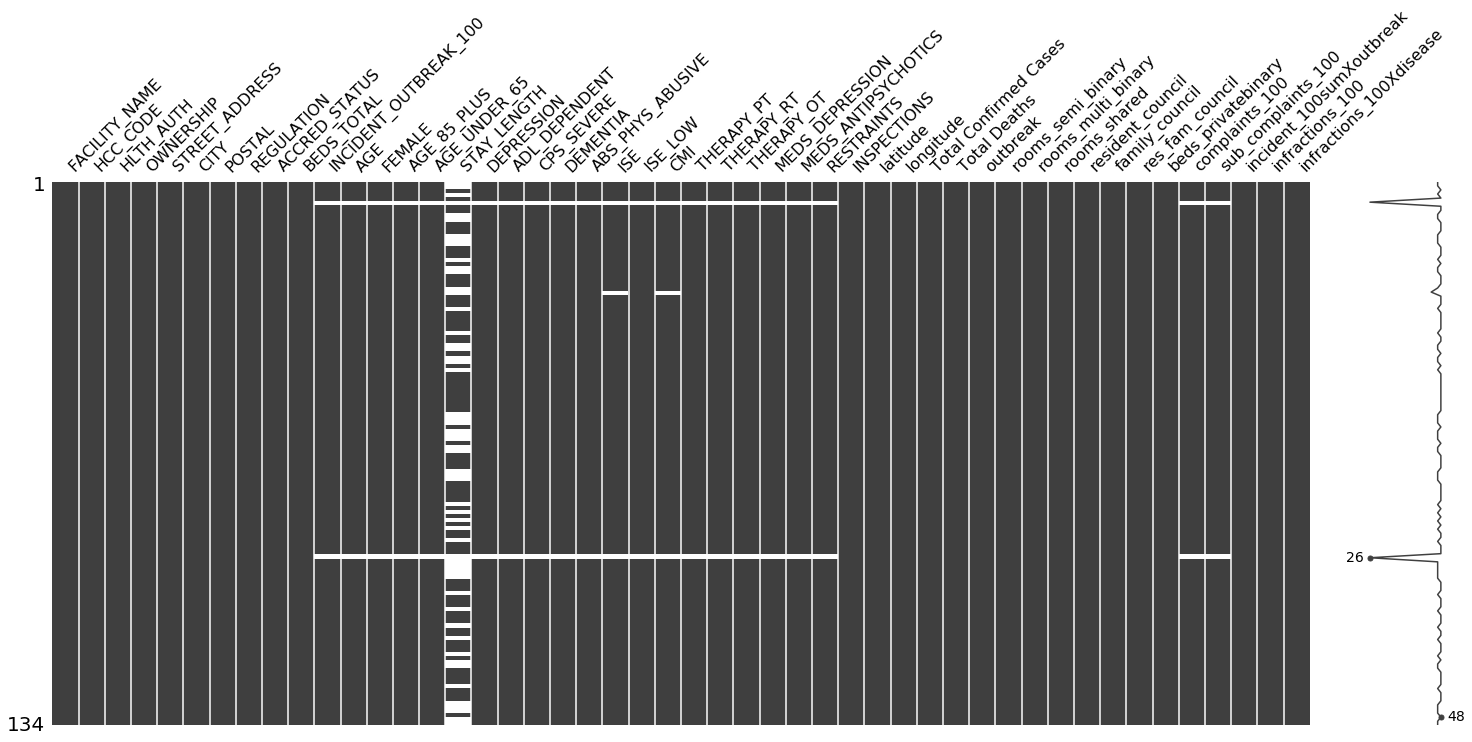

In [20]:
import missingno as msno
msno.matrix(ltc_mainland)

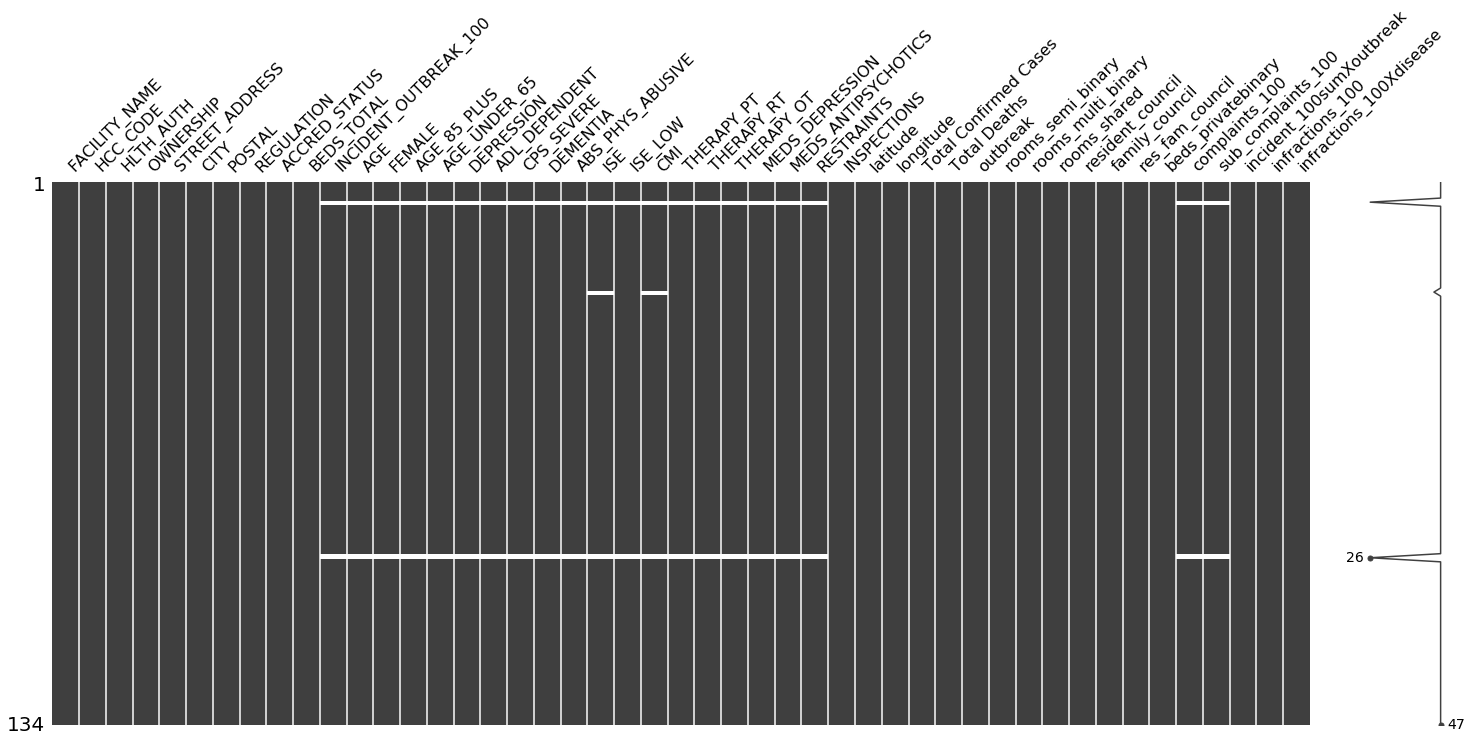

In [21]:
# Remove STAY_LENGTH covariate with many missing values
ltc_mainland.drop(['STAY_LENGTH'], axis = 1, inplace = True)

# # Remove CMI and ISE covariates with missing values for 3 homes
# ltc_mainland.drop(['CMI', 'ISE'], axis = 1, inplace = True)

# ltc_mainland = ltc_mainland.dropna(axis=1)
# ltc_mainland.info()

import missingno as msno
msno.matrix(ltc_mainland)

In [22]:
# Review 3 homes with missing values
ltc_mainland[ltc_mainland['ISE'].isnull()]

,FACILITY_NAME,HCC_CODE,HLTH_AUTH,OWNERSHIP,STREET_ADDRESS,CITY,POSTAL,REGULATION,ACCRED_STATUS,BEDS_TOTAL,INCIDENT_OUTBREAK_100,AGE,FEMALE,AGE_85_PLUS,AGE_UNDER_65,DEPRESSION,ADL_DEPENDENT,CPS_SEVERE,DEMENTIA,ABS_PHYS_ABUSIVE,ISE,ISE_LOW,CMI,THERAPY_PT,THERAPY_RT,THERAPY_OT,MEDS_DEPRESSION,MEDS_ANTIPSYCHOTICS,RESTRAINTS,INSPECTIONS,latitude,longitude,Total Confirmed Cases,Total Deaths,outbreak,rooms_semi_binary,rooms_multi_binary,rooms_shared,resident_council,family_council,res_fam_council,beds_privatebinary,complaints_100,sub_complaints_100,incident_100sumXoutbreak,infractions_100,infractions_100Xdisease
13,Bella Coola General Hospital,9A8DC,Vancouver Coastal Health,HA,1025 Elcho Street,Bella Coola,V0T1C0,Hospital Act,Accredited,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,52.374176,-126.757950,0.0,0.0,0,0,0,0,1,1,1,0,NaN,NaN,0.0,0.000000,0.000000
57,Delta View Habilitation Centre,9C280,Fraser Health,PFP,9341 Burns Drive,Delta,V4K3N3,Hospital Act,Accredited,80,0.0,79.0,66.7,33.3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49.092204,-122.965047,0.0,0.0,0,1,0,1,1,1,1,1,0.0,0.0,6.3,0.000000,0.000000
200,R. W. Large Memorial Hospital,9A773,Vancouver Coastal Health,HA,88 Waglisla Street,Bella Bella,V0T1Z0,Hospital Act,Accredited,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,52.161211,-128.143320,0.0,0.0,0,0,0,0,0,0,0,0,NaN,NaN,0.0,14.285714,14.285714


In [23]:
# Remove 2 remaining homes with missing values
ls =['Bella Coola General Hospital', 
     'Delta View Habilitation Centre',
     'R. W. Large Memorial Hospital']

ltc_mainland = ltc_mainland[~ltc_mainland['FACILITY_NAME'].isin(ls)]

In [24]:
ltc_mainland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 3 to 293
Data columns (total 47 columns):
FACILITY_NAME               131 non-null object
HCC_CODE                    131 non-null object
HLTH_AUTH                   131 non-null object
OWNERSHIP                   131 non-null object
STREET_ADDRESS              131 non-null object
CITY                        131 non-null object
POSTAL                      131 non-null object
REGULATION                  131 non-null object
ACCRED_STATUS               131 non-null object
BEDS_TOTAL                  131 non-null int64
INCIDENT_OUTBREAK_100       131 non-null float64
AGE                         131 non-null float64
FEMALE                      131 non-null float64
AGE_85_PLUS                 131 non-null float64
AGE_UNDER_65                131 non-null float64
DEPRESSION                  131 non-null float64
ADL_DEPENDENT               131 non-null float64
CPS_SEVERE                  131 non-null float64
DEMENTIA                

In [25]:
# Export mainland dataset
ltc_mainland.to_csv(r'../data/BC/ngan_bc_ltc_mainland.csv', index = False)

## Filter for homes in VCH, Fraser and IH


In [28]:
# Dataset with NH and VIHA homes removed
ltc_xNHorVIHA = ltc_xNH[~ltc_xNH.HLTH_AUTH.str.contains("Island", na=False)]
ltc_xNHorVIHA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 3 to 293
Data columns (total 48 columns):
FACILITY_NAME               211 non-null object
HCC_CODE                    211 non-null object
HLTH_AUTH                   211 non-null object
OWNERSHIP                   211 non-null object
STREET_ADDRESS              211 non-null object
CITY                        211 non-null object
POSTAL                      211 non-null object
REGULATION                  211 non-null object
ACCRED_STATUS               211 non-null object
BEDS_TOTAL                  211 non-null int64
INCIDENT_OUTBREAK_100       208 non-null float64
AGE                         208 non-null float64
FEMALE                      208 non-null float64
AGE_85_PLUS                 208 non-null float64
AGE_UNDER_65                208 non-null float64
STAY_LENGTH                 138 non-null float64
DEPRESSION                  208 non-null float64
ADL_DEPENDENT               208 non-null float64
CPS_SEVERE              

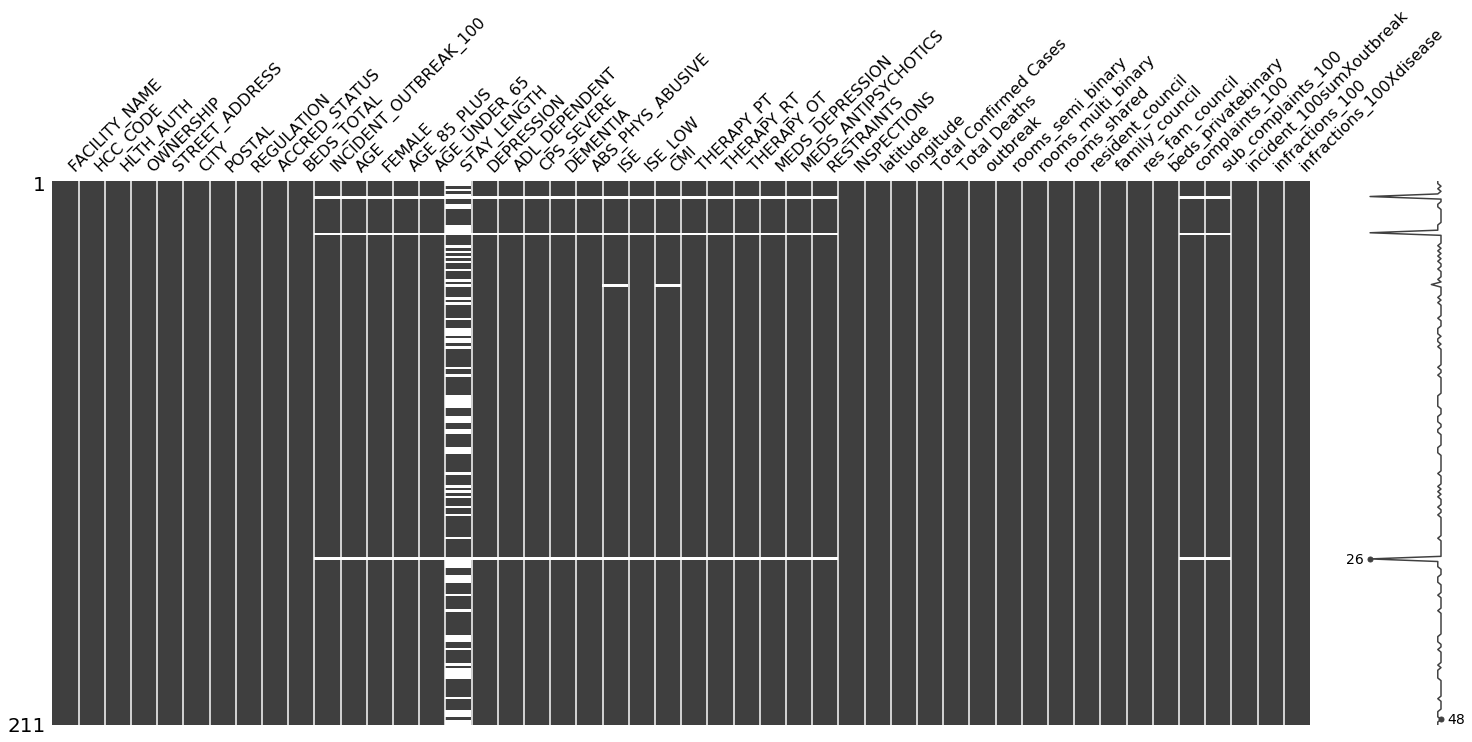

In [29]:
import missingno as msno
msno.matrix(ltc_xNHorVIHA)

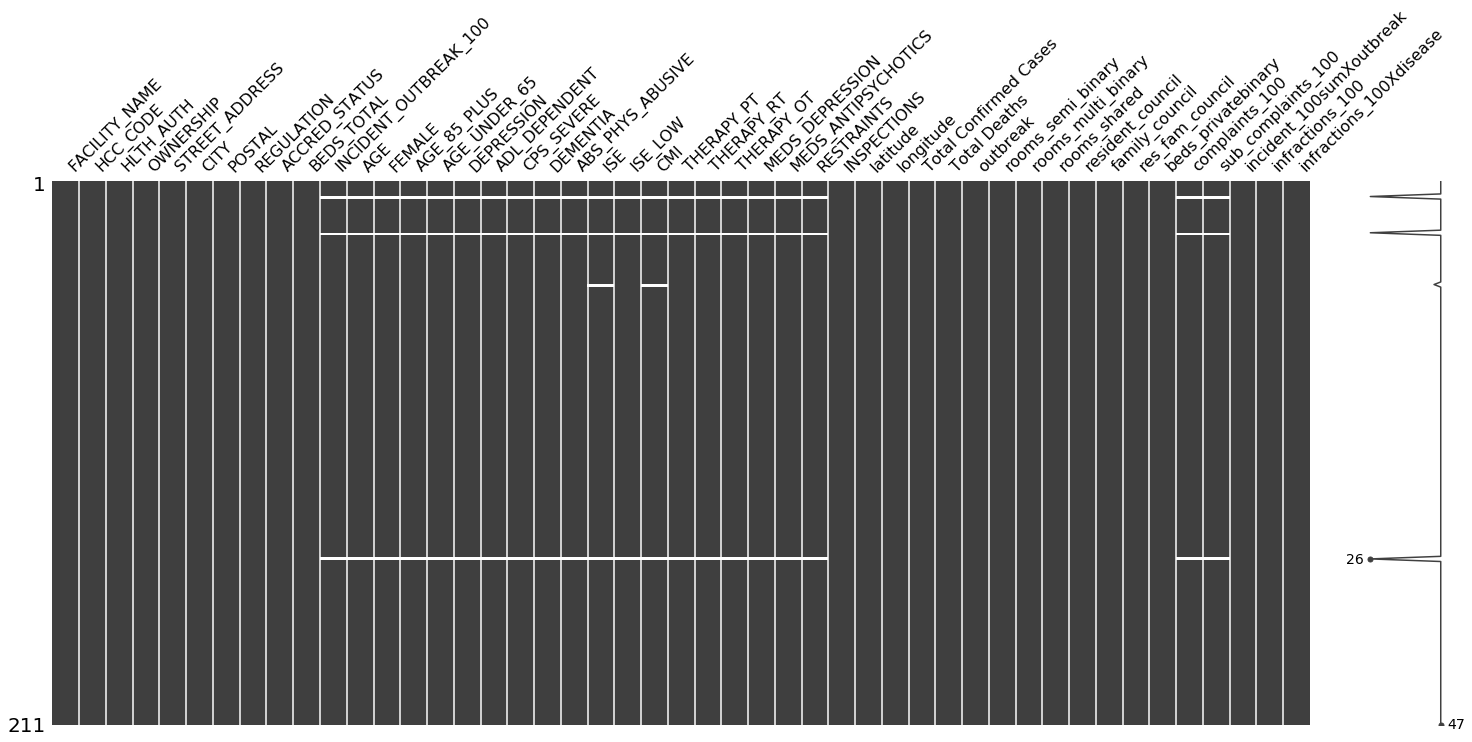

In [30]:
# Remove STAY_LENGTH covariate with many missing values
ltc_xNHorVIHA.drop(['STAY_LENGTH'], axis = 1, inplace = True)

# # Remove CMI and ISE covariates with missing values for 4 homes
# ltc_xNHorVIHA.drop(['CMI', 'ISE'], axis = 1, inplace = True)

import missingno as msno
msno.matrix(ltc_xNHorVIHA)

In [31]:
# Review 3 homes with missing values
# ltc_xNHorVIHA[ltc_xNHorVIHA['AGE'].isnull()]

# Remove 4 remaining homes with missing values
ls =['Bella Coola General Hospital', 
     'Delta View Habilitation Centre',
     'Cariboo Place',
     'R. W. Large Memorial Hospital']

ltc_xNHorVIHA = ltc_xNHorVIHA[~ltc_xNHorVIHA['FACILITY_NAME'].isin(ls)]

In [32]:
ltc_xNHorVIHA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 3 to 293
Data columns (total 47 columns):
FACILITY_NAME               207 non-null object
HCC_CODE                    207 non-null object
HLTH_AUTH                   207 non-null object
OWNERSHIP                   207 non-null object
STREET_ADDRESS              207 non-null object
CITY                        207 non-null object
POSTAL                      207 non-null object
REGULATION                  207 non-null object
ACCRED_STATUS               207 non-null object
BEDS_TOTAL                  207 non-null int64
INCIDENT_OUTBREAK_100       207 non-null float64
AGE                         207 non-null float64
FEMALE                      207 non-null float64
AGE_85_PLUS                 207 non-null float64
AGE_UNDER_65                207 non-null float64
DEPRESSION                  207 non-null float64
ADL_DEPENDENT               207 non-null float64
CPS_SEVERE                  207 non-null float64
DEMENTIA                

In [33]:
# Export xNHorVIHA dataset
ltc_xNHorVIHA.to_csv(r'../data/BC/ngan_bc_ltc_xNHorVIHA.csv', index = False)

In [ ]:
# # Proportion of values missing for each column
# def missing(dff):
#     print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))
# missing(ltc_fil2)

In [ ]:
# # Convert datatype for OPEN_DATE
# ltc2['OPEN_DATE'].replace({'2009 / 2016': "2009"}, inplace=True)
# ltc2['OPEN_DATE'] = pd.to_numeric(ltc2['OPEN_DATE'])

# # Create new columns WRT facility dates (surrogate for design standards)
# ltc2.loc[ltc2['OPEN_DATE'] > 1994, 'facility_design'] = 'post1994'
# ltc2.loc[ltc2['OPEN_DATE'] < 1994, 'facility_design'] = 'pre1994'